In [20]:
def show_slices(slices):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, len(slices), figsize=(8, 3), sharex=True, sharey=True)
    for i, slice in enumerate(slices):
       axes[i].imshow(slice)
    fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                            bottom=0.02, left=0.02, right=0.98)
    plt.show()

In [80]:
def image_segmentation(in_file_name, out_file_name, show_image):
    import nibabel as nib
    from skimage import exposure, segmentation, color
    from skimage import feature
    from skimage.future import graph
    import numpy as np
    import matplotlib.pyplot as plt
 
    #example_ni1 = os.path.join(data_path, in_file_name)
    n1_img = nib.load(in_file_name)
    img_data = n1_img.get_data()
    print(img_data.shape)
    #save_example_ni1 = os.path.join(data_path, out_file_name)

    slice = np.zeros((176,176,208))
    segm= np.zeros((176,176,208))
    for i in range(0,175):
        slice[i] = img_data[:,:,i,0]
        slice[i] = exposure.rescale_intensity(slice[i], out_range=(0, 256))
        img = color.gray2rgb(slice[i])
        if (img.min() >= 0):
            labels1 = segmentation.slic(img, compactness=30, n_segments=400, multichannel=False)
            out1 = color.label2rgb(labels1, img, kind='avg')
            g = graph.rag_mean_color(img, labels1, mode='similarity')
            labels2 = graph.cut_normalized(labels1, g)
            out2 = color.label2rgb(labels2, img, kind='avg')
            segm[i] = color.rgb2gray(out2)


    if (show_image):
        show_slices([slice[100], slice[110], slice[120]])
        plt.suptitle("slices")

    for i in range(0,175):
        img_data[:,:,i,0] = segm[i]        

    if (show_image):
        # display results
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

        ax1.imshow(img_data[:,:,100,0])
        ax1.axis('off')
        ax1.set_title('image 100', fontsize=20)

        ax2.imshow(img_data[:,:,110,0])
        ax2.axis('off')
        ax2.set_title('image 110', fontsize=20)

        ax3.imshow(img_data[:,:,120,0])
        ax3.axis('off')
        ax3.set_title('image 120', fontsize=20)

        fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                            bottom=0.02, left=0.02, right=0.98)

        plt.show()

    save_img = nib.Nifti1Image(img_data, np.eye(4))
    nib.save(save_img, save_example_ni1)

(176, 208, 176, 1)


C:\Users\ia\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:307: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


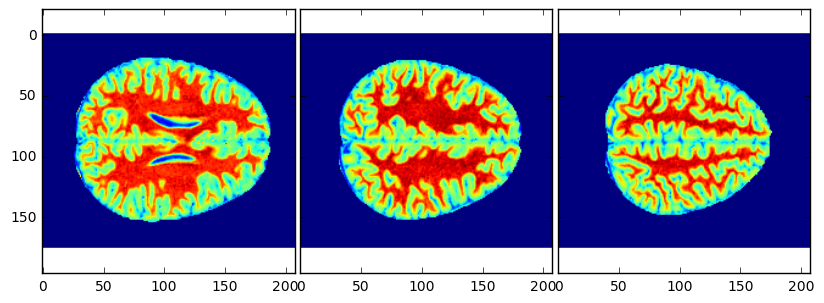

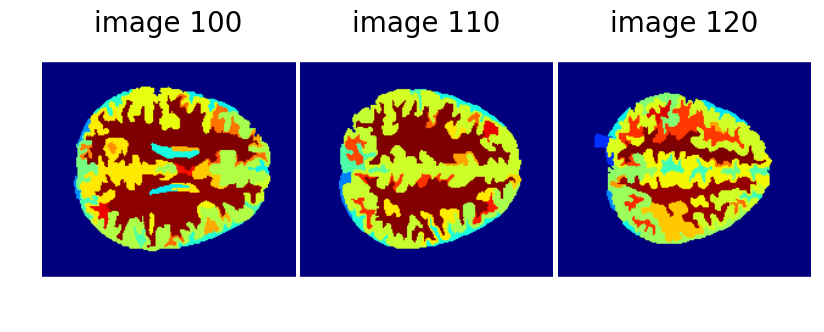

In [81]:
from nibabel.testing import data_path
import os
from IPython.display import *

dataFile_size = 278

for i in range(0,dataFile_size):
    file_name_input = "\\ETH\\data\\set_train\\train_" + str(i+1) + ".nii"
    example_ni1 = os.path.join(data_path, file_name_input)
    file_name_output = "\\ETH\\data\\set_train\\train_" + str(i+1) + "_sg.nii"
    save_example_ni1 = os.path.join(data_path, file_name_output)
    image_segmentation(example_ni1, save_example_ni1, show_image=False)
